In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [4]:
# loading the diabetes dataset to a pandas DataFrame
dataset = pd.read_csv('Dataset/Implemented Dataset.csv') 

Data Collection and Analysis

Diabetes Dataset

In [5]:
#showing first 6 receords from the database
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,156,33.6,50,1
1,1,85,66,29,156,26.6,31,0
2,8,183,64,29,156,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [6]:
# number of rows and Columns in this dataset
dataset.shape

(768, 8)

In [7]:
# getting the statistical measures of the data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.721354,72.386719,29.018229,154.868490,32.456641,33.177083,0.348958
std,3.123898,30.438952,12.096642,8.420790,81.281504,6.875155,11.633019,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.400000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,41.000000,1.000000
max,10.000000,199.000000,122.000000,63.000000,744.000000,67.100000,72.000000,1.000000


In [8]:
#counting total number of diabetic and non-diabetic patients
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [9]:
#separating data and labels
X = dataset.drop(columns = 'Outcome', axis=1)
Y = dataset['Outcome']

In [10]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0              6      148             72             35      156  33.6   50
1              1       85             66             29      156  26.6   31
2              8      183             64             29      156  23.3   32
3              1       89             66             23       94  28.1   21
4              0      137             40             35      168  43.1   33
..           ...      ...            ...            ...      ...   ...  ...
763           10      101             76             48      180  32.9   63
764            2      122             70             27      156  36.8   27
765            5      121             72             23      112  26.2   30
766            1      126             60             29      156  30.1   47
767            1       93             70             31      156  30.4   23

[768 rows x 7 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
7

Data Standardization

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [13]:
standardized_data = scaler.transform(X)

In [14]:
print(standardized_data)

[[ 0.72322585  0.86388555 -0.03198993 ...  0.01392996  0.16641145
   1.44707743]
 [-0.87838157 -1.20717968 -0.5283186  ...  0.01392996 -0.85241096
  -0.18726884]
 [ 1.36386882  2.01447734 -0.69376149 ...  0.01392996 -1.33271296
  -0.10125062]
 ...
 [ 0.40290437 -0.02371383 -0.03198993 ... -0.52775138 -0.91062939
  -0.27328707]
 [-0.87838157  0.14065642 -1.02464727 ...  0.01392996 -0.34299976
   1.18902275]
 [-0.87838157 -0.94418727 -0.19743282 ...  0.01392996 -0.29933594
  -0.87541464]]


In [15]:
X = standardized_data
Y = dataset['Outcome']

New Data

In [16]:
print(X)
print(Y)

[[ 0.72322585  0.86388555 -0.03198993 ...  0.01392996  0.16641145
   1.44707743]
 [-0.87838157 -1.20717968 -0.5283186  ...  0.01392996 -0.85241096
  -0.18726884]
 [ 1.36386882  2.01447734 -0.69376149 ...  0.01392996 -1.33271296
  -0.10125062]
 ...
 [ 0.40290437 -0.02371383 -0.03198993 ... -0.52775138 -0.91062939
  -0.27328707]
 [-0.87838157  0.14065642 -1.02464727 ...  0.01392996 -0.34299976
   1.18902275]
 [-0.87838157 -0.94418727 -0.19743282 ...  0.01392996 -0.29933594
  -0.87541464]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


Training the Model

In [19]:
classifier = svm.SVC(kernel='linear', gamma='auto' , C=9, random_state=0)

In [20]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=9, gamma='auto', kernel='linear', random_state=0)

Model Evaluation

Accuracy Score

In [21]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print('Accuracy : ', training_data_accuracy*100)

Accuracy :  77.68729641693811


In [23]:
# accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [24]:
print('Accuracy : ', test_data_accuracy*100)

Accuracy :  76.62337662337663


Making a Predictive System

In [25]:
input_data = (1,103,30,38,83,43.3,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Dhruv\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving The Trained Model



In [26]:
import pickle

In [27]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [28]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [29]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



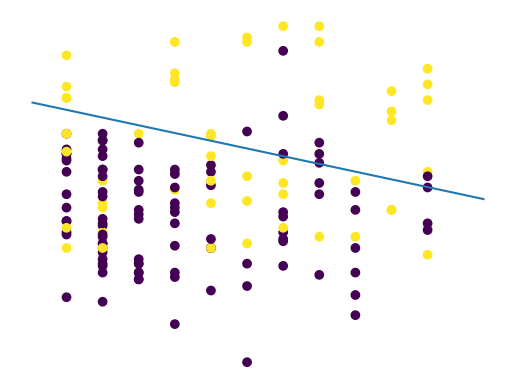

((np.float64(-1.7),
  np.float64(2.7),
  np.float64(-2.8015711650067154),
  np.float64(2.622647292283597)),
 None)

In [30]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
w=classifier.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-1.5,2.5)
yy=a*xx-(classifier.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.axis('off'),plt.show()